  Buenas noches, les adjunto su segundo trabajo del curso de Estadística y Análisis Exploratorio, por favor seguir las instrucciones de solución dadas en el texto y además les recuerdo que tienen plazo para entregar hasta el día viernes 20 de septiembre 6:00pm como un archivo en pdf que debe incluir los planteamientos simbólicos de las preguntas y los códigos en Python utilizados, el archivo se debe llamar Trabajo2EAE_nombreintregrante1_nombreintegrante2_nombreintegrante3 y debe ser enviado como respuesta directa a este correo.

La base de datos asignada a su grupo contiene la información de un nicho de mercado donde se midieron varias variables para posteriores análisis a 200 empresas, de esa base se tomó la medición de la inversión que hizo cada empresa a marketing digital el último mes y sus respectivas ventas en pesos colombianos.

1. Construir un IC para al 95% de confianza necesario para responder: ¿Puede afirmarse que la inversión en Marketing es superior a los cuatro millones de pesos colombianos? Justifique su respuesta.

2. ¿Se puede afirmar que las ventas medias de las empresas encuestadas son superiores a su inversión en marketing en más de dos millones de pesos colombianos? Justifique su respuesta mediante una prueba de hipótesis con una significancia del 6%.

3. Analice si hay una relación lineal entre las variables inversión en Marketing y ventas, mediante una regresión lineal con todos sus repecivos componentes.

In [2]:
import pandas as pd
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
DatosMd = pd.read_csv("https://raw.githubusercontent.com/JuanJoseNaranjo/Distribuciones_estadistica/main/DatosTrabajo2EAE20242.csv", sep=';')
DatosMd

,Empresa,Inversión en marketing digital,Venta
0,1,2008148,50225258.80
1,2,2041273,45103182.50
2,3,2057234,45143085.00
3,4,2067740,45169350.00
4,5,2145127,58773569.43
...,...,...,...
195,196,6977006,66977011.10
196,197,7005563,90445616.60
197,198,7065010,76803062.00
198,199,7080760,77080765.10


1. Construir un IC para al 95% de confianza necesario para responder:

¿Puede afirmarse que la inversión en Marketing es superior a los cuatro millones de pesos colombianos? Justifique su respuesta.

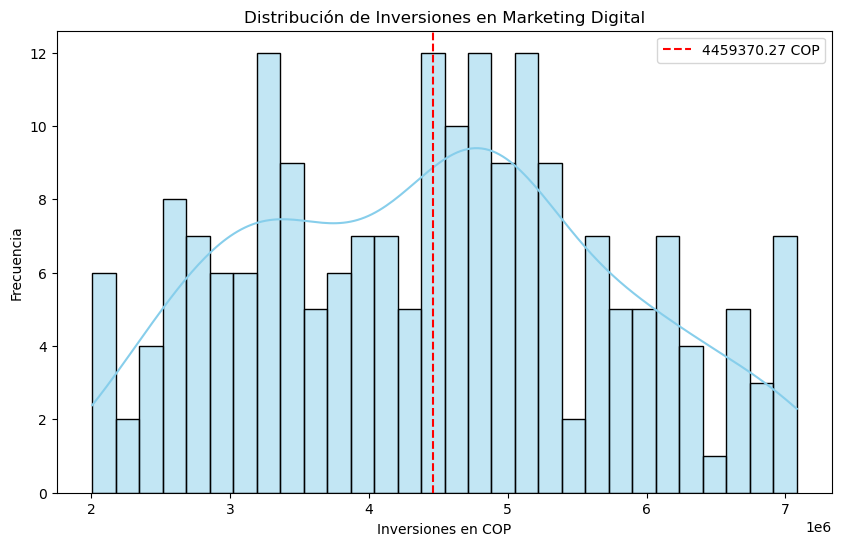

In [4]:
# Construcción intervalo de confianza
# Miremos como se comporta la inversión en marketing digital

# Gráfica de distribución
columna_inversiones = 'Inversión en marketing digital'  
plt.figure(figsize=(10,6))
sns.histplot(DatosMd[columna_inversiones], bins=30, kde=True, color='skyblue')
plt.axvline(DatosMd[columna_inversiones].mean(), color='red', linestyle='--', label=f'{DatosMd[columna_inversiones].mean()} COP')
plt.title('Distribución de Inversiones en Marketing Digital')
plt.xlabel('Inversiones en COP')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [5]:
# Bajo la gráfica anterior se puede sospechar que la variable se comporta como una distribución normal,
# pero dado que n = 200, osea n >= 30 asumimos distribución no normal
n = 200

In [6]:
# hallamos la media y varianza de la variable:

media_md = DatosMd[columna_inversiones].mean()
std_md = DatosMd[columna_inversiones].std()
print(f"La media muestral de las inversiones en marketing digital es {media_md:.4f}")
print(f"La desviación muestral de las inversiones en marketing digital es {std_md:.4f}")

# Hallamos Z alpha/2 con un 95% de confianza
z_alpha2 = norm.ppf(1 - 0.05/2)

lim_sup = media_md+z_alpha2*std_md/np.sqrt(n)
lim_inf = media_md-z_alpha2*std_md/np.sqrt(n)
print(f"el intervalo de confianza se encuentra entre ({lim_inf:.4f}, {lim_sup:.4f})")

La media muestral de las inversiones en marketing digital es 4459370.2700
La desviación muestral de las inversiones en marketing digital es 1304053.6104
el intervalo de confianza se encuentra entre (4278640.9814, 4640099.5586)


In [7]:
# En base a la observación de las 200 empresas de inversión en marketing digital, la media muestral, desviación muestral y el intervalo
# de confianza, se puede concluir que la media de inversión de marketing es superior a cuatro millones de pesos colombianos dado que 
# la media varía en un intervalo de (4_278_640.9814 COP, 4_640_099.5586 COP) para un 95% de confianza. Adicionalmente, si aumentamos 
# el nivel de confianza del 99% se tendrá un intervalo de (4_221_851.7231 COP, 4_696_888.8169 COP) por lo que nos genera más precisión 
# de la afirmación.

3. Analice si hay una relación lineal entre las variables inversión en Marketing y ventas, mediante una regresión lineal con todos sus repecivos componentes.

Formula Utilizada:

y = β0+β1 * x

x= variable independiente

y= dependiente ventas

β0= intercepto

β1=pendiente midiendo el cambio en y




In [8]:
x= DatosMd['Inversión en marketing digital'] # Variable independiente
y= DatosMd['Venta'] # variable dependiente

x=sm.add_constant(x) # Añadimos la constante

modelo_lineal=sm.OLS(y,x).fit() # Ajustamos el modelo
resumen_modelo=modelo_lineal.summary() # Resumen del modelo
#print(resumen_modelo)


In [9]:


intercepcion=modelo_lineal.params.iloc[0] # Valor de la intercepción
pendiente=modelo_lineal.params.iloc[1] # Valor de la pendiente
coeficiente_determinacion=modelo_lineal.rsquared # Coeficiente de determinación
valor_p=modelo_lineal.pvalues.iloc[1]  # Valor p para la pendiente



print(f'Intercepción (β0): {intercepcion}')
print(f'Pendiente (β1): {pendiente}')
print(f'Coeficiente de determinación (R²): {coeficiente_determinacion}')
print(f'Valor p para la pendiente: {valor_p}')
print(resumen_modelo)




Intercepción (β0): 39575016.104937345
Pendiente (β1): 4.660085715861094
Coeficiente de determinación (R²): 0.5580385437669773
Valor p para la pendiente: 5.903083607999437e-37
                            OLS Regression Results                            
Dep. Variable:                  Venta   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     250.0
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           5.90e-37
Time:                        13:15:35   Log-Likelihood:                -3384.0
No. Observations:                 200   AIC:                             6772.
Df Residuals:                     198   BIC:                             6779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   

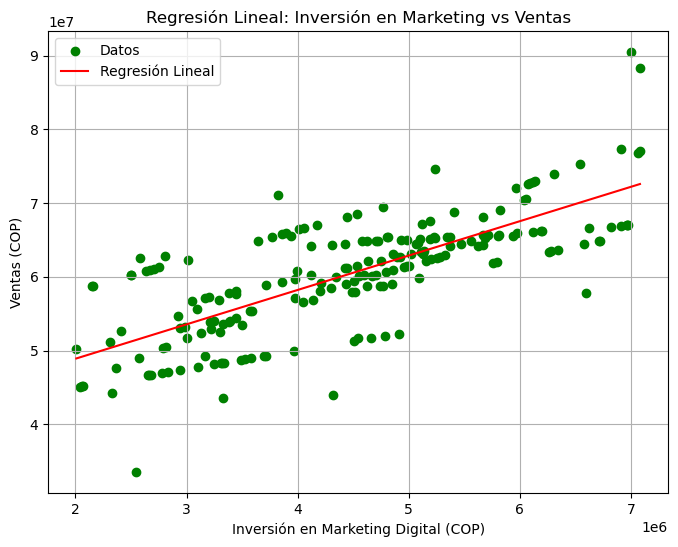

In [10]:
predicion_ventas= modelo_lineal.predict(x) # Predicción de ventas
# Graficar la línea de regresión con los datos reales
plt.figure(figsize=(8, 6))

# Gráfico de dispersión de las ventas reales vs inversión
plt.scatter(DatosMd['Inversión en marketing digital'], DatosMd['Venta'], color='green', label='Datos')

# Graficar la línea de regresión
plt.plot(DatosMd['Inversión en marketing digital'], predicion_ventas, color='red', label='Regresión Lineal')

# Añadir etiquetas y título
plt.title('Regresión Lineal: Inversión en Marketing vs Ventas')
plt.xlabel('Inversión en Marketing Digital (COP)')
plt.ylabel('Ventas (COP)')
plt.legend()
plt.grid(True)